Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,model_selection
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)
diabetes['smoking_history'].replace({'No Info':0, 'current':1, 'ever':2, 'former':3, 'never':4, 'not current':5}, inplace=True)

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [3]:
x = diabetes[
    [
        "gender",
        "age",
        "hypertension",
        "heart_disease",
        "smoking_history",
        "bmi",
        "HbA1c_level",
        "blood_glucose_level",
    ]
].to_numpy()
y = diabetes[["diabetes"]].to_numpy()

In [67]:
# X_train, X_test, y_train, y_test = model_selection.train_test_split(
#     x, y, test_size=0.2
# )

length = x.shape[0]
X_train = x[0 : int(length * 0.8)]
X_test = x[int(length * 0.8):]

y_train = y[0 : int(length * 0.8)]
y_test = y[int(length * 0.8):]

w = np.zeros((X_train.shape[1] + 1, 1))
b = 0

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [50]:
def gradientDescent(X, y, W, b):
    cost = -(
        np.sum(
            y.T * np.log(sigmoid(X.dot(W) + b))
            + (1 - y.T) * np.log(1 - sigmoid(X.dot(W) + b))
        )
        / X.shape[0]
    )
    parameter_change = (
        np.dot(X.T, np.reshape(sigmoid(X.dot(W) + b) - y.T, X.shape[0])) / X.shape[0]
    )
    b_change = np.sum(np.reshape(sigmoid(X.dot(W) + b) - y.T, X.shape[0])) / X.shape[0]
    return (parameter_change, b_change, cost)

In [16]:
def predict(final_pred, m):
    y_pred = np.zeros(m)
    for i in range(final_pred.shape[0]):
        if final_pred[i] > 0.5:
            y_pred[i] = 1
    return y_pred

In [51]:
def train(x, y, parameters, b, learningRate, iterations):
    for _ in range(iterations):
        parameter_change, b_change, cost = gradientDescent(x, y, parameters, b)

        # if _ % 100 == 0:
        #     print(_, " ", cost)
        parameters -= parameter_change * learningRate
        b -= b_change * learningRate
        # print(parameters, b)

    return parameters, b

0   0.6931471805599453


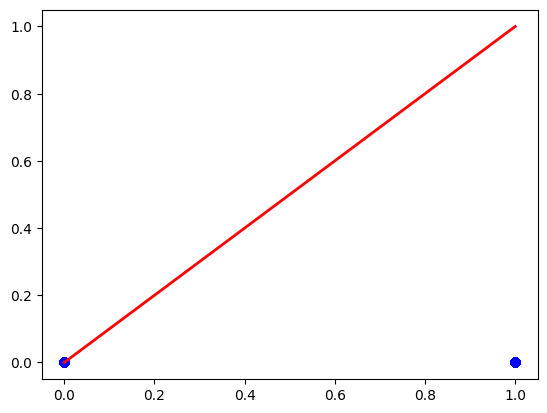

91.825


In [59]:
slope = np.zeros(X_train.shape[1])
intercept = np.zeros(1)
learningRate = 0.00001
iterations = 100
slope, intercept = train(X_train, y_train, slope, intercept, learningRate, iterations)
y_pred = predict(sigmoid(X_test.dot(slope) + intercept), X_test.shape[0])

# plt.scatter(y_test, y_pred, color="blue", label="Predicted vs. Actual")
# plt.plot(
#     [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth="2"
# )
# plt.show()
print(accuracy(y_test, y_pred))


In [33]:
def accuracy(y_test, y_pred):
    y_test = y_test.reshape(y_pred.shape)
    return np.sum(y_pred == y_test) * 100 / len(y_test)